<a href="https://colab.research.google.com/github/guiaguiar27/2-1B/blob/main/pratica_8_ccf425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Introdução à Ciência dos Dados \
> Ciência da Computação – UFV/Florestal


* **Nome:** %s
* **Matrícula:**  %d

# Aula Prática 08
## Regressão Linear

**Objetivo:** Extrair correlação entre atributos de dados reais por meio da técnica de regressão linear.
**Pré-requisitos:** Linguagem de programação Python, estatística básica \
**Meta:** Ao final da prática, o aluno será capaz de preparar dados e extrair correlações interessantes a partir da aplicação da técnica de regressão linear, e prever valores numéricos contínuos.

----

In [ ]:
### NÃO REMOVA ESSA CÉLULA! ####
!pip --no-cache-dir install --upgrade learntools_dados_ufv

!wget https://raw.githubusercontent.com/gfviegas/CCF425-resources/master/p8/weatherHistory.csv

zsh:1: command not found: pip
zsh:1: command not found: wget


In [ ]:
#### Não altere essa célula!!! ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

from learntools_dados_ufv.core import binder; binder.bind(globals())
from learntools_dados_ufv.ccf425.pratica_8 import *

/Users/viegas/Projects/ufv/mestrado/learntools_dados_ufv/learntools_dados_ufv/core/globals_binder.py:14: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn("Ignoring repeated attempt to bind to globals")


# Roteiro

## Carregando os dados

Vamos utilizar como exemplo um conjunto de dados que contém várias características e os preços de imóveis da cidade de Boston. O objetivo da regressão é gerar um modelo que permita prever o preço de um imóvel com base em suas características.

Esse conjunto de dados está na biblioteca `scikit-learn`.

In [ ]:
boston = load_boston()

Observe que a variável `boston` é um dicionário/mapa/hash...

In [ ]:
# Note que boston é um dicionário/mapa/hash
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

### Transformando o dataset em um DataFrame Pandas

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Os preços dos imóveis estão no campo target do conjunto original. Então, vamos colocar os preços como uma nova coluna (lembre, o preço é a variável dependente que queremos estimar utilizando regressão)

In [ ]:
df['PRICE'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Avaliando relação par-a-par entre variáveis e o preço do imóvel

Antes de se criar um modelo de regressão, é importante avaliar as correlações entre todas as possíveis variáveis.

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWar

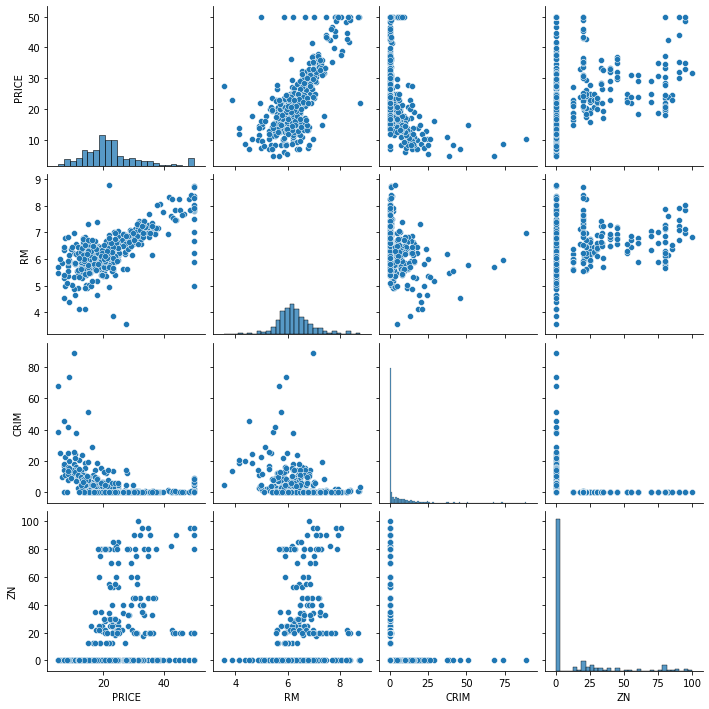

In [ ]:
sns.pairplot(df[['PRICE','RM','CRIM','ZN']])

### Analisando o RM

Vamos olhar individualmente para o RM (Número de Quartos). Qual sua relação com o preço?

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)


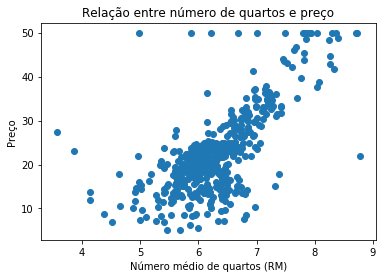

In [ ]:
plt.scatter(df.RM, df.PRICE)
plt.xlabel('Número médio de quartos (RM)')
plt.ylabel('Preço')
plt.title('Relação entre número de quartos e preço')
plt.show()

#### Calculando a Correlação & Coeficiente de Pearson
Uma medida importante para saber se duas variáveis numéricas estão relacionadas é a Correlação de Pearson

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWar

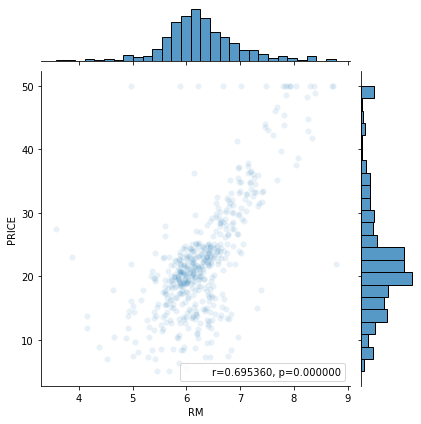

In [ ]:
# sns.jointplot(x='RM', y='PRICE', data=df, alpha = 0.1, stat_func=pearsonr)

graph = sns.jointplot(data=df, x='RM', y='PRICE', alpha=0.1)
r, p = stats.pearsonr(df['RM'], df['PRICE'])
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  bottom, top = sorted([bottom, top], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3270: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  left, right = sorted([left, right], reverse=reverse)
/usr/local/lib/python3.9/site-packages/matplotlib/axes/_base.py:3652: DeprecationWar

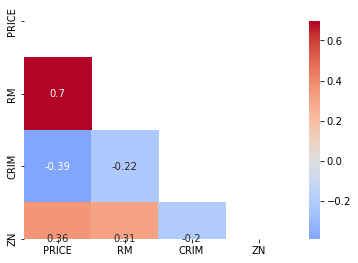

In [ ]:
correlation_columns = ['PRICE','RM','CRIM','ZN']
correlation = df[correlation_columns].corr()
matrix = np.triu(df[correlation_columns].corr())
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, center=0, cmap='coolwarm', mask=matrix)

## Criando um modelo de regressão linear utilizando RM e PRICE

#### Funções importantes de LinearRegression:
- **lm.fit()** -> Fits a linear model;
- **lm.predict()** -> Predict Y using the linear model with estimated coefficients;
- **lm.score()** -> Returns the coefficient of determination (R^2). 

### Cenário 1:
- Variável Independente: `RM`
- Variável Dependente: `PRICE`

In [ ]:
X = df.RM
Y = df.PRICE

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X.values.reshape(-1,1), Y))

Coeficiente estimado:  [9.10210898]
R2 (score):  0.48352545599133423


Ou seja, a cada aumento de uma unidade em RM (número de quartos), o preço aumenta em 9.10. O R2 (coeficiente de determinação) é de 0.48. Ou seja, 52% da variação do preço não é explicada pelo RM.

### Cenário 2:
Agora vamos fazer a regressão multi-variada. Para isso, vamos separar os atributos independentes (X) e o atributo dependente preço (Y), e criar uma instância da classe LinearRegression


- Variável Independente: `Todas colunas, exceto PRICE`
- Variável Dependente: `PRICE`

In [ ]:
X = df.drop('PRICE', axis=1)
Y = df.PRICE

lm = LinearRegression()
lm.fit(X, Y)

print('Coeficiente estimado: ', lm.coef_)
print('R2 (score): ', lm.score(X, Y))

Coeficiente estimado:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
R2 (score):  0.7406426641094095


Observem como o R2 melhorou, ao adicionar as outras variáveis.

Agora, vamos apresentar os coeficientes estimados para todas as variáveis independentes

In [ ]:
# Mostrar os coeficientes da regressão.
print('Intercept %.3f ' % lm.intercept_)

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Intercept 36.459 


,Coefficient
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


Nesse caso, a equação linear ficaria assim:

**Equação**: `PRICE = 36.49 + CRIM * -0.10 + ZN * 0.04 + …. + LSTAT * -0.52`

### Prevendo preço de um imóvel que não se sabe o preço

A partir de um imóvel que se sabe as características, vamos prever qual o preço.

In [ ]:
X = sm.add_constant(df.drop('PRICE', axis =1))
Y = df.PRICE

results = sm.OLS(Y, X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        17:51:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

Podemos ver que `INDUS` e `AGE` apresentaram um valor-p alto, e o intervalo de confiança inclui o zero. Então, podemos remover essas duas variáveis, e vamos ver que o resultado não muda significativamente.

In [ ]:
X = sm.add_constant(df.drop(['PRICE', 'AGE', 'INDUS'], axis=1))
Y = df.PRICE

results = sm.OLS(Y,X).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          5.54e-137
Time:                        17:52:58   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.0

Note que o R^2 continuou igual!

# Exercícios

Os exercícios abaixo são referentes ao conjunto de dados `weatherHistory` que contém o histórico de variáveis relacionadas ao clima da cidade de Szede, Hungria, entre 2006 e 2016.

Execute e não remova a célula abaixo antes de iniciar os exercícios. Faça todas as atividades manipulando a variável `df`.

In [ ]:
# Atribui o dataframe com o estado "original" em uma variável isolada
original_df = pd.read_csv('./weatherHistory.csv')
df = original_df.copy()
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## 1. Faça uma análise exploratória dos dados.
Antes de fazer a regressão, entenda as variáveis, e as suas possíveis relações entre elas.

Utilize de gráficos par a par e também **ESCREVA** quais variáveis você **observa através dos gráficos** com correlação fortes ou fracas.

Essa questão não possui verificação automática mas você pode pedir dicas com `q1.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A ANÁLISE EXPLORATÓRIA 

q1.hint()

#### RESPOSTA 1:

{{Insira aqui sua resposta!}}

## 2. Obtenha a Equação Linear que representa a temperatura em termos da umidade.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q2.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q2.hint()

#### Resposta 2:

- Coeficiente estimado: {{Insira aqui sua resposta!}}
- Coeficiente de determinação: {{Insira aqui sua resposta!}}
- Equação Linear: {{Insira aqui sua resposta!}}

## 3. Obtenha a Equação Linear que representa a temperatura em termos da umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q3.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q3.hint()

#### Resposta 3:

- Coeficiente estimado: {{Insira aqui sua resposta!}}
- Coeficiente de determinação: {{Insira aqui sua resposta!}}
- Equação Linear: {{Insira aqui sua resposta!}}

## 4. Obtenha a Equação Linear que representa a temperatura aparente em termos da temperatura E umidade E velocidade do vento.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a regressão.

Essa questão não possui verificação automática mas você pode pedir dicas com `q4.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A REGRESSÃO

q4.hint()

#### Resposta 4:

- Coeficiente estimado: {{Insira aqui sua resposta!}}
- Coeficiente de determinação: {{Insira aqui sua resposta!}}
- Equação Linear: {{Insira aqui sua resposta!}}

## 5. Quais variáveis do dataset você indica para serem utilizadas para prever a umidade? EVIDENCIE e EXPLIQUE sua resposta.
É esperado que você preencha a célula de markdown abaixo com a resposta, após realizar a sua análise.

Essa questão não possui verificação automática mas você pode pedir dicas com `q5.hint()`

In [ ]:
# INSIRA SEU CÓDIGO PARA CRIAR A ANÁLISE

q5.hint()

#### Resposta 5:
{{ ESCREVA AQUI SUA RESPOSTA! }}